In [1]:
#import libraries and set seaborn styling
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tmdbsimple as tmdb
import requests
import pandas as pd
import time
import json
import numpy as np
from ast import literal_eval
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import models
sns.set_context('talk')
sns.set_style('ticks')

In [2]:
df = pd.read_csv('cleaned_dataBase.csv')

In [3]:
df

,title,age_rating,Movie_Genre,Movie_Script,final_text,final_text2
0,Reservoir Dogs,18,"Action,Crime,Thriller",Quentin Tara...,Quentin Tara...,quentin tarantino october movie dedicated foll...
1,How to Train Your Dragon,PG,"Animation,Adventure,Comedy",HOW TO TRAIN YO...,HOW TRAIN YOUR ...,train dragon written dean deblois chris sander...
2,Scream,18,"Horror,Mystery,Thriller",...,...,scream scary movie kevin williamson rewrite ju...
3,Groundhog Day,PG,"Comedy,Fantasy,Romance",GROUNDH...,GROUNDH...,groundhog written danny rubin second revision ...
4,Black Panther,12,"Action,Adventure,Sci-Fi",BLACK PANTHER ...,BLACK PANTHER ...,black panther written ryan coogler joe robert ...
...,...,...,...,...,...,...
1041,You Can Count On Me,15,Drama,"""YOU CAN COU...",YOU CAN COUN...,count screenplay kenneth lonergan shooting dra...
1042,You've Got Mail,PG,"Comedy,Romance",You've Got Mail \t\t\tYou've Got Mail \t...,You have Got Mail \t\t\tYou have Got Mail...,got mail got mail nora ephron delia ephron bas...
1043,Youth in Revolt,15,"Comedy,Drama,Romance",...,...,youth revolt written gustin nash july black co...
1044,Zero Dark Thirty,15,"Drama,Thriller",ZERO DARK...,ZERO DARK...,zero dark thirty written mark boal october voi...


C:\Users\ojoho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


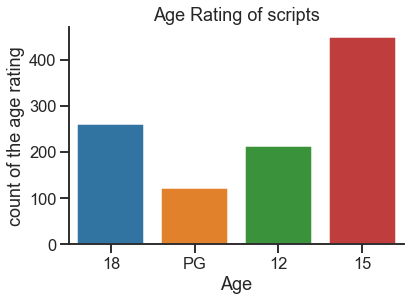

In [6]:
sns.countplot(df.age_rating)
plt.title('Age Rating of scripts')
plt.xlabel('Age')
plt.ylabel('count of the age rating')
sns.despine()

In [4]:
# Breaks "Genre" into the constituting individual genres
def find_genres(genre):
    
    start = 0
    set_of_genre = []
    for i in range(len(genre)):
        
        k=0
        substring = ""
        if (genre[i]==','):
            substring = genre[start:i]
            start = i+1
            k = 1
        
        if(i==len(genre)-1):
            substring = genre[start:i+1]
            k = 1
            
        if (k==1):
            set_of_genre.append(substring)         
    
    return (set_of_genre)

In [5]:
#list of genre for each movie
all_genre = []
Genre_list = df['Movie_Genre']

for i in range (len(Genre_list)):
    
    set_of_genre = find_genres(Genre_list[i])
    
    for j in range (len(set_of_genre)):
        all_genre.append(set_of_genre[j])
        
uniq, counts = np.unique(all_genre, return_counts=True)
print("Number of unique genres:", len(uniq))
print("Unique genres are:", uniq)
id_to_genre = dict(zip(counts, uniq))

Number of unique genres: 20
Unique genres are: ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']


In [69]:
genre_counts = list(zip(counts, uniq))

In [70]:
genre_counts

[(263, 'Action'),
 (152, 'Adventure'),
 (38, 'Animation'),
 (3, 'Biography'),
 (352, 'Comedy'),
 (208, 'Crime'),
 (590, 'Drama'),
 (36, 'Family'),
 (92, 'Fantasy'),
 (4, 'Film-Noir'),
 (3, 'History'),
 (137, 'Horror'),
 (28, 'Music'),
 (105, 'Mystery'),
 (190, 'Romance'),
 (139, 'Sci-Fi'),
 (2, 'Sport'),
 (356, 'Thriller'),
 (28, 'War'),
 (14, 'Western')]

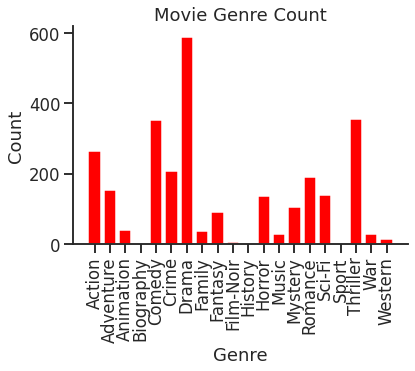

In [77]:
def valuelabel(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',
                 bbox = dict(facecolor = 'white', alpha =0.8))
for i in genre_counts:
    plt.bar(height = int(i[0]), x = i[1], color='r')
    plt.xticks(rotation=90)
    plt.title('Movie Genre Count')
    plt.ylabel('Count')
    plt.xlabel('Genre')
    sns.despine()

In [6]:
id_to_genre = {int(key):value for key, value in id_to_genre.items()} #convert string keys to int keys
id_to_genre

{263: 'Action',
 152: 'Adventure',
 38: 'Animation',
 3: 'History',
 352: 'Comedy',
 208: 'Crime',
 590: 'Drama',
 36: 'Family',
 92: 'Fantasy',
 4: 'Film-Noir',
 137: 'Horror',
 28: 'War',
 105: 'Mystery',
 190: 'Romance',
 139: 'Sci-Fi',
 2: 'Sport',
 356: 'Thriller',
 14: 'Western'}

## Distribution of plot lengths in movies

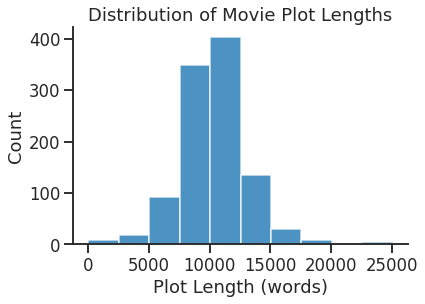

In [47]:
#tmdb lengths
plot_lengths = []
for plot in df.final_text2:
    plot_length = len(plot.split())
    plot_lengths.append(plot_length)
    
#plot tmdb lengths
bins = np.linspace(0, 500, 30)
plt.hist(plot_lengths, bins = 10, alpha = 0.8, label = 'Movie length')
plt.xlabel('Plot Length (words)')
plt.ylabel('Count')
plt.title('Distribution of Movie Plot Lengths')
#plt.legend(loc='upper right')
sns.despine();

In [9]:
def split_genres(values):
    splitted = values.split(',')
    return splitted

In [10]:
df['splitted_genres'] = df['Movie_Genre'].apply(lambda x: split_genres(x))

Average TMDB Genres: 2.6195028680688335


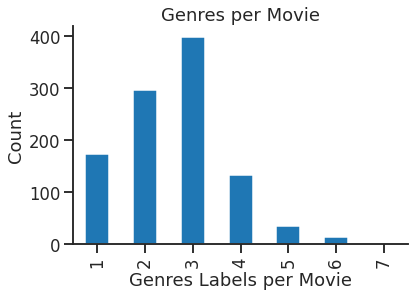

In [12]:
#count number of genres per movie
num_genres_per_movie = [len(genres) for genres in df.splitted_genres]

#collect counts and plot for both imdb and tmdb
num_genre_counts = Counter(num_genres_per_movie)
genre_counts_df = pd.DataFrame.from_dict(num_genre_counts, orient='index')
genre_counts_df = genre_counts_df.sort_index()
genre_counts_df.plot(kind='bar', legend=False)
plt.title('Genres per Movie')
plt.xlabel('Genres Labels per Movie')
plt.ylabel('Count')
sns.despine()

print('Average Movie Genres:', np.mean(num_genres_per_movie))

In [13]:
print('Shortest and longest plots (words):')
print('Movie: ', min(plot_lengths),',', max(plot_lengths))
print('Mean plot length:', np.mean(plot_lengths))

Shortest and longest plots (words):
Movie:  1 , 25080
Mean plot length: 10372.981835564053


/home/676220/.conda/envs/jupyter/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


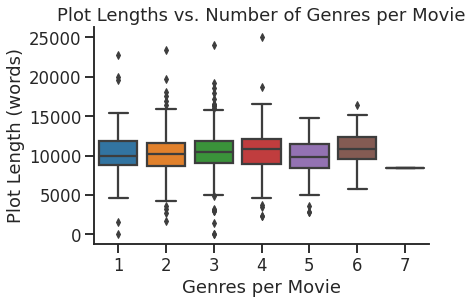

In [14]:
sns.boxplot(num_genres_per_movie, plot_lengths)
plt.title('Plot Lengths vs. Number of Genres per Movie')
plt.xlabel('Genres per Movie')
plt.ylabel('Plot Length (words)')
sns.despine()

---
### Apply TFIDF to Plots

Sklearn's TfidfVectorizer will apply both a count vectorizer and Term Frequency Inverse Document Frequency (TFIDF) transformation to our plots. The count vectorizer will convert our collection of plots into a matrix of word counts. We set max_df and min_df to ignore words specific to our corpus of movie plots that occur both a lot and few times, and we also ignore english stop words if the previous arguments missed some. The TFIDF transformation will essentially apply a rarity score to each word returning a normalized TFIDF matrix for each feature - plots.

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.005, 
                          stop_words = get_stop_words('en'))

lemmatized_bow=tfidf_vectorizer.fit_transform(df['final_text2'])

#check shape of resulting matrices
lemmatized_bow.shape

/home/676220/.conda/envs/jupyter/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


(1046, 37673)

As seen above, movies are represented by a 37673 length array respectively. Each number in the array is the associated TFIDF score for the count vectorized representation of each plot. Most of the array values will be zero respectively.

---

### Add Bag-of-Words Matrices to Movies DF and save

We cast the resulting arrays into lists that pandas can save in a nice fashion for when we import in the modeling and analysis notebook. We also save them as numpy arrays for easier importing.

In [16]:
#each plot is a row vector of the TFIDF sparse matrices
df['lemmatized_bow_plot'] = [plot for plot in lemmatized_bow]

#resave movies csv
df.to_csv('movies.csv', encoding="utf-8", index=False)

#save TFIDF matrices an numpy arrays
np.save('lemmatized_bow.npy',lemmatized_bow.toarray())

### We have now transformed and saved each plot as a bag-of-words TFIDF representation.
---
# Word2vec transformation of our movie plots
---


---
#### Apply word2vec Transformation of Plots

For this transformation we will use the Google News pretrained word2vec model ([link](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)) that was trained on a more than 3 billion word corpus. It contains 3 million words, each represented by a 300-dimension vector. We make a couple of design choices for how we transform our movie plots:

- If a word in the cleaned plots (lowered, punctuation and stop word dropped, tokenized) is in the word2vec model, add it to a running list for that plot.
- If a word is not in the word2vec model, skip it. We print some of these words below for example.
- We then take two different representations for each plot. One as a matrix where each row is a 300-dimension representation of a particular word in the plot, and a column-wise mean vector, where each plot is reduced to 1x300 dimension array.

The assumption we make by taking the mean of each plot is that the resulting 300-dimension vector will point in the direction of one or more genres, but we acknowledge that it will most likely reduce some of the semantic value of certain words.


In [17]:
#Load the pretrained google news word2vec model
model = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [18]:
#collect words not in the Google News w2v model
not_w2v = []

#word2vec function
def apply_words2Vec(cleaned_plot, mean=False):
    
    """
    apply_words2Vec()
    -applies the following transformations to the cleaned plot of a movie:
        1) removes words that are not in google's model
        2) creates a 300-dimension vector representation of each word
        3) outputes vector of vectors for plot
        If mean = True
        4) converts the resulting nd_array into a 1d_array via np.mean() and
           outputs single vector for each plot.
    -also keeps track of all words not found in google's model
    
    -inputs: cleaned_plot (string)
    
    -outputs: vector representation of plot
    
    """
    vecs=[]
    for word in cleaned_plot:
        #add word vector to list if it is in the google model
        try:
            vecs.append(model.get_vector(word)) 
        except:
            #if the word is not in the w2v model, add it to
            #our list of skipped words
            not_w2v.append(word)
    
    #take the column-wise mean of vecs to reduce nd_aray to 1d_array
    if mean == True:
        vecs = np.mean(vecs, axis=0)
        return vecs
    #return matrix of w2v arrays where each row is a word in the plot
    return np.stack(vecs)

In [19]:
#apply transformation to three sets of plots and add columns to df

#columns with mean w2v
df['w2v_plot_mean'] = df['final_text2'].apply(lambda x: apply_words2Vec(x, mean=True))

#check shapes of first movie vectors to confirm nd_array and 300-dimensions
print('Mean vector representations:')
print(df.loc[0,'w2v_plot_mean'].shape)


Mean vector representations:
(300,)


Each script has been transformed into a 300-dimension representation of that plot, as well as an matrix where each row represents a word in the plot. We will use these features as predictors in our multi-lable classification modeling.

In [20]:
#print some of our skipped words
print(len(not_w2v))
np.random.seed(112)
print(np.random.choice(not_w2v, 50, replace=False))

15461466
['a' ' ' ' ' ' ' ' ' ' ' 'a' ' ' ' ' ' ' ' ' 'a' ' ' ' ' ' ' ' ' ' ' 'a'
 ' ' 'a' ' ' ' ' 'a' 'a' ' ' ' ' ' ' 'a' ' ' 'a' 'a' ' ' 'a' 'a' ' ' ' '
 'a' 'a' ' ' ' ' ' ' ' ' ' ' ' ' 'a' ' ' ' ' 'a' ' ' ' ']


In [21]:
for plot in df.w2v_plot_mean:
    if len(plot) != 300:
        print("AH! no word2vec representation")
print('All movies have a word2vec representation.')


All movies have a word2vec representation.


---
**Save w2v data as a numpy arrays/matrices for further modeling and analysis**

In [22]:
#w2v mean vectors
np.save('w2v_mean.npy', df['w2v_plot_mean'].to_numpy())


---
#### Update and save DataFrame for future analysis

In [23]:
df.to_csv('movies.csv', encoding="utf-8", index=False)

### We have now transformed and saved each script as a 300-dimension vector and n_words x 300 dimension matrix word2vec representation.
---
# Doc2Vec transformation of our movie scripts


#### Transform Plots into TaggedDocument objects

In order to use gensim's Doc2Vec model, we must first transform each plot into a TaggedDocument object.

In [24]:
#turn plots into TaggedDocuments
#apply to movies df for imdb, tmdb, and combined
cols = ['final_text2']
n_cols = ['final_text2_tag_docs']
for ncol, col in zip(n_cols, cols):
    acc = []
    for i, plot in enumerate(df[col]): 
        z = models.doc2vec.TaggedDocument(words=plot, tags=[str(i)])
        acc.append(z)
    df[ncol] = acc
df['final_text2_tag_docs'][:1]

0    (quentin tarantino october movie dedicated fol...
Name: final_text2_tag_docs, dtype: object

#### Train Doc2Vec models 

Next we train Doc2Vec models on each set of plots. We selected a vector size of 20, because there are 20 possible genres. Since we are only concerned with document vectors we set dm=0, so that the model does not get word vectors as well and training goes faster. Finally, because we are using a relatively small dataset we set epochs=20 so that our models don't overfit.

In [25]:
cols = ['final_text2_tag_docs']
n_cols = ['final_text2_doc_vec']
for ncol, col in zip(n_cols, cols):
    model = models.doc2vec.Doc2Vec(alpha=0.025, min_alpha=0.001, vector_size=20, dm=0, window=5)
    model.build_vocab(df[col])
    model.train(df[col], total_examples=1046, epochs=20)
    df[ncol] = [model.docvecs[x] for x in range(1046)]
    
df['final_text2_doc_vec'][0]

/tmp/ipykernel_12029/2209652003.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  df[ncol] = [model.docvecs[x] for x in range(1046)]


array([ 0.03617398, -0.59795517, -0.18874198,  0.18629728, -0.03990475,
       -0.3327708 , -0.07588181, -0.14957233, -0.11348549, -0.07526778,
        0.12269644,  0.28732917,  0.04281153,  0.06973169,  0.08831201,
        0.10064102,  0.00767008,  0.10423903, -0.26633754, -0.00774563],
      dtype=float32)

Now each plot is represented by a (1,20) vector, so we save these.

In [26]:
np.save('final_text2_doc_vec.npy', df['final_text2_doc_vec'].to_numpy())

In [27]:
df

,title,age_rating,Movie_Genre,Movie_Script,final_text,final_text2,splitted_genres,lemmatized_bow_plot,w2v_plot_mean,final_text2_tag_docs,final_text2_doc_vec
0,Reservoir Dogs,18,"Action,Crime,Thriller",Quentin Tara...,Quentin Tara...,quentin tarantino october movie dedicated foll...,"[Action, Crime, Thriller]","(0, 2274)\t0.004028333577020339\n (0, 6065)...","[-0.17329833, 0.10741242, 0.003158559, 0.14356...",(quentin tarantino october movie dedicated fol...,"[0.036173984, -0.59795517, -0.18874198, 0.1862..."
1,How to Train Your Dragon,PG,"Animation,Adventure,Comedy",HOW TO TRAIN YO...,HOW TRAIN YOUR ...,train dragon written dean deblois chris sander...,"[Animation, Adventure, Comedy]","(0, 36785)\t0.000801220424554652\n (0, 2136...","[-0.17948367, 0.11807792, 0.00061120617, 0.138...",(train dragon written dean deblois chris sande...,"[0.20166238, -0.096167915, -0.064272255, -0.11..."
2,Scream,18,"Horror,Mystery,Thriller",...,...,scream scary movie kevin williamson rewrite ju...,"[Horror, Mystery, Thriller]","(0, 34011)\t0.004051747528794127\n (0, 2713...","[-0.17613457, 0.11569605, 0.0013841288, 0.1403...",(scream scary movie kevin williamson rewrite j...,"[0.20066816, -0.3281479, 0.027115317, 0.186074..."
3,Groundhog Day,PG,"Comedy,Fantasy,Romance",GROUNDH...,GROUNDH...,groundhog written danny rubin second revision ...,"[Comedy, Fantasy, Romance]","(0, 7260)\t0.004501376415498538\n (0, 30456...","[-0.17665856, 0.11156767, -0.00057527487, 0.14...",(groundhog written danny rubin second revision...,"[-0.052015994, -0.30212227, -0.07259407, 0.171..."
4,Black Panther,12,"Action,Adventure,Sci-Fi",BLACK PANTHER ...,BLACK PANTHER ...,black panther written ryan coogler joe robert ...,"[Action, Adventure, Sci-Fi]","(0, 2385)\t0.00700146683628221\n (0, 29114)...","[-0.17583425, 0.11159041, 0.00093200465, 0.142...",(black panther written ryan coogler joe robert...,"[0.22511983, -0.24465646, -0.14246406, 0.16651..."
...,...,...,...,...,...,...,...,...,...,...,...
1041,You Can Count On Me,15,Drama,"""YOU CAN COU...",YOU CAN COUN...,count screenplay kenneth lonergan shooting dra...,[Drama],"(0, 25248)\t0.01709537058760785\n (0, 18348...","[-0.17328008, 0.11223773, -0.0038208088, 0.140...",(count screenplay kenneth lonergan shooting dr...,"[-0.07136779, -0.3847483, 0.1581235, 0.0993573..."
1042,You've Got Mail,PG,"Comedy,Romance",You've Got Mail \t\t\tYou've Got Mail \t...,You have Got Mail \t\t\tYou have Got Mail...,got mail got mail nora ephron delia ephron bas...,"[Comedy, Romance]","(0, 15575)\t0.012400957367064\n (0, 20195)\...","[-0.1728267, 0.11165822, -0.002811314, 0.14136...",(got mail got mail nora ephron delia ephron ba...,"[-0.24790123, -0.25568238, -0.19426906, 0.1134..."
1043,Youth in Revolt,15,"Comedy,Drama,Romance",...,...,youth revolt written gustin nash july black co...,"[Comedy, Drama, Romance]","(0, 19132)\t0.012286615910346094\n (0, 2077...","[-0.17626648, 0.11581809, -0.0018269443, 0.140...",(youth revolt written gustin nash july black c...,"[0.07141014, -0.18429676, 0.05500198, 0.221052..."
1044,Zero Dark Thirty,15,"Drama,Thriller",ZERO DARK...,ZERO DARK...,zero dark thirty written mark boal october voi...,"[Drama, Thriller]","(0, 35177)\t0.009642029032394079\n (0, 1132...","[-0.17518224, 0.11266811, -0.0005036399, 0.142...",(zero dark thirty written mark boal october vo...,"[0.08029097, -0.26506498, -0.0984526, 0.055697..."


In [28]:
df.to_csv('final_movies.csv', encoding="utf-8", index=False)

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/676220/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/676220/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
mlb=MultiLabelBinarizer()

MultiLabelBinarizer converts the corresponding categorical variables into a numpy array. Pandas behaves strangely when reading csv's that contain numpy arrays, so we will instead save the numpy arrays as .npy files.

In [56]:
def genre_tokenization(text):
    text = re.sub(',', ' ', text)
    text = word_tokenize(text)
    return text

In [57]:
df['Movie_Genre'] = df['Movie_Genre'].apply(lambda x : genre_tokenization(x))

In [58]:
y = df['Movie_Genre']

In [59]:
new_data = pd.DataFrame(mlb.fit_transform(y))

In [60]:
new_data.columns = mlb.classes_ 

In [61]:
np.save('binarized_data.npy', new_data)

In [62]:
new_data

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1043,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
mlb.classes_ 

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype=object)

In [64]:
target_names = {}
movies_target_names = []
for genre_id in mlb.classes_:
    movies_target_names.append(genre_id)

    
target_names['movies'] = target_names



In [42]:
movies_target_names

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [43]:
with open('target_names.json', 'w') as fp:
    json.dump(movies_target_names, fp)